In [19]:
from tensorflow.keras.layers import Dense, Reshape, Flatten  
from tensorflow.keras.models import Sequential  

def build_generator():  
    model = Sequential([  
        Dense(128, input_dim=100, activation='relu'),  # Input: 100 random numbers  
        Dense(784, activation='tanh'),                 # Output: 28x28 image (flattened)  
        Reshape((28, 28, 1))                           # Reshape to image dimensions  
    ])  
    return model  

generator = build_generator()  

In [20]:
def build_discriminator():  
    model = Sequential([  
        Flatten(input_shape=(28, 28, 1)),  # Input: 28x28 image  
        Dense(128, activation='relu'),  
        Dense(1, activation='sigmoid')     # Output: 0 (fake) or 1 (real)  
    ])  
    return model  

discriminator = build_discriminator()  

In [21]:
from tensorflow.keras.models import Model  
import tensorflow as tf
# Link generator and discriminator  
gan_input = tf.keras.Input(shape=(100,))  
generated_image = generator(gan_input)  
gan_output = discriminator(generated_image)  
gan = Model(gan_input, gan_output)  

# Compile the GAN  
discriminator.compile(loss='binary_crossentropy', optimizer='adam')  
discriminator.trainable = False  # Freeze discriminator during GAN training  
gan.compile(loss='binary_crossentropy', optimizer='adam')  

In [22]:
import numpy as np  
from tensorflow.keras.datasets import mnist  

# Load MNIST data  
(train_images, _), (_, _) = mnist.load_data()  
train_images = (train_images.astype('float32') - 127.5) / 127.5  # Normalize to [-1, 1]  

# Training loop  
epochs = 100  
batch_size = 32  

for epoch in range(epochs):  
    # Train discriminator on real + fake images  
    idx = np.random.randint(0, train_images.shape[0], batch_size)  
    real_images = train_images[idx]  
    noise = np.random.normal(0, 1, (batch_size, 100))  
    fake_images = generator.predict(noise)  

    # Label real=1, fake=0  
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))  
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))  
    d_loss = 0.5 * (d_loss_real + d_loss_fake)  

    # Train generator to fool the discriminator  
    noise = np.random.normal(0, 1, (batch_size, 100))  
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  

    # Print progress  
    if epoch % 10 == 0:  
        print(f"Epoch: {epoch}, D Loss: {d_loss:.2f}, G Loss: {g_loss:.2f}")  

1/1 [==============================] - 0s 64ms/step
Epoch: 0, D Loss: 0.54, G Loss: 0.98
1/1 [==============================] - 0s 18ms/step
Epoch: 10, D Loss: 0.23, G Loss: 1.75
1/1 [==============================] - 0s 20ms/step
Epoch: 20, D Loss: 0.27, G Loss: 2.06
1/1 [==============================] - 0s 19ms/step
Epoch: 30, D Loss: 0.06, G Loss: 3.22
1/1 [==============================] - 0s 26ms/step
Epoch: 40, D Loss: 0.02, G Loss: 4.19
1/1 [==============================] - 0s 30ms/step
Epoch: 50, D Loss: 0.02, G Loss: 4.63
1/1 [==============================] - 0s 30ms/step
Epoch: 60, D Loss: 0.02, G Loss: 5.12
1/1 [==============================] - 0s 20ms/step
Epoch: 70, D Loss: 0.01, G Loss: 5.62
1/1 [==============================] - 0s 20ms/step
Epoch: 80, D Loss: 0.00, G Loss: 6.27
1/1 [==============================] - 0s 15ms/step
Epoch: 90, D Loss: 0.00, G Loss: 6.63
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 68ms/step


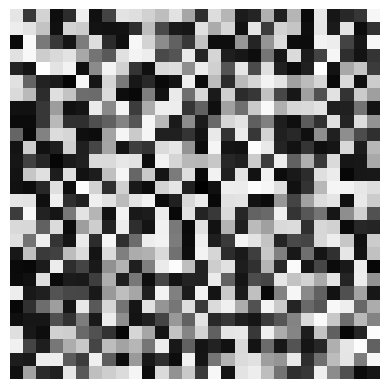

In [23]:
import matplotlib.pyplot as plt  

noise = np.random.normal(0, 1, (1, 100))  
generated_image = generator.predict(noise).reshape(28, 28)  

plt.imshow(generated_image, cmap='gray')  
plt.axis('off')  
plt.show()  

1/1 [==============================] - 0s 220ms/step
Epoch: 0, D Loss: 0.65, G Loss: 0.85
1/1 [==============================] - 0s 19ms/step
Epoch: 10, D Loss: 0.58, G Loss: 0.68
1/1 [==============================] - 0s 20ms/step
Epoch: 20, D Loss: 0.31, G Loss: 1.63
1/1 [==============================] - 0s 31ms/step
Epoch: 30, D Loss: 0.05, G Loss: 3.71
1/1 [==============================] - 0s 25ms/step
Epoch: 40, D Loss: 0.03, G Loss: 4.61
1/1 [==============================] - 0s 25ms/step
Epoch: 50, D Loss: 0.02, G Loss: 4.79
1/1 [==============================] - 0s 16ms/step
Epoch: 60, D Loss: 0.01, G Loss: 5.68
1/1 [==============================] - 0s 16ms/step
Epoch: 70, D Loss: 0.01, G Loss: 5.86
1/1 [==============================] - 0s 16ms/step
Epoch: 80, D Loss: 0.00, G Loss: 6.04
1/1 [==============================] - 0s 16ms/step
Epoch: 90, D Loss: 0.00, G Loss: 6.44
1/1 [==============================] - 0s 47ms/step


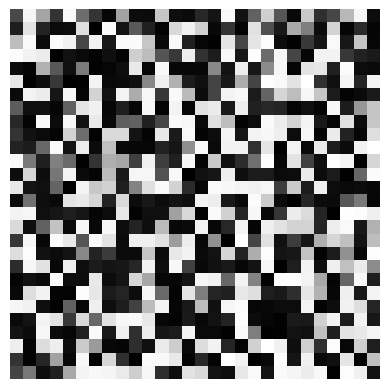

In [1]:
from tensorflow.keras.layers import Dense, Reshape, Flatten  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.models import Model  
import tensorflow as tf
import numpy as np  
from tensorflow.keras.datasets import mnist  

# Import necessary layers and models from TensorFlow Keras and build the generator model

def build_generator():  
    model = Sequential([  
        Dense(128, input_dim=100, activation='relu'),  # Input: 100 random numbers  
        Dense(784, activation='tanh'),                 # Output: 28x28 image (flattened)  
        Reshape((28, 28, 1))                           # Reshape to image dimensions  
    ])  
    return model  

generator = build_generator()  
# Build the discriminator model
def build_discriminator():  
    model = Sequential([  
        Flatten(input_shape=(28, 28, 1)),  # Input: 28x28 image  
        Dense(128, activation='relu'),  
        Dense(1, activation='sigmoid')     # Output: 0 (fake) or 1 (real)  
    ])  
    return model  

discriminator = build_discriminator()  
# Link the generator and discriminator to form the GAN and compile the models
# Link generator and discriminator  
gan_input = tf.keras.Input(shape=(100,))  
generated_image = generator(gan_input)  
gan_output = discriminator(generated_image)  
gan = Model(gan_input, gan_output)  

# Compile the GAN  
discriminator.compile(loss='binary_crossentropy', optimizer='adam')  
discriminator.trainable = False  # Freeze discriminator during GAN training  
gan.compile(loss='binary_crossentropy', optimizer='adam')  
# Load MNIST data, normalize it, and implement the training loop for the GAN

# Load MNIST data  
(train_images, _), (_, _) = mnist.load_data()  
train_images = (train_images.astype('float32') - 127.5) / 127.5  # Normalize to [-1, 1]  

# Training loop  
epochs = 100  
batch_size = 32  

for epoch in range(epochs):  
    # Train discriminator on real + fake images  
    idx = np.random.randint(0, train_images.shape[0], batch_size)  
    real_images = train_images[idx]  
    noise = np.random.normal(0, 1, (batch_size, 100))  
    fake_images = generator.predict(noise)  

    # Label real=1, fake=0  
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))  
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))  
    d_loss = 0.5 * (d_loss_real + d_loss_fake)  

    # Train generator to fool the discriminator  
    noise = np.random.normal(0, 1, (batch_size, 100))  
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  

    # Print progress  
    if epoch % 10 == 0:  
        print(f"Epoch: {epoch}, D Loss: {d_loss:.2f}, G Loss: {g_loss:.2f}")  
# Generate and display an image using the trained generator model
import matplotlib.pyplot as plt  

noise = np.random.normal(0, 1, (1, 100))  
generated_image = generator.predict(noise).reshape(28, 28)  

plt.imshow(generated_image, cmap='gray')  
plt.axis('off')  
plt.show()  